# Stima del parametro di una distribuzione binomiale

In questo esempio vedremo aspetti peculiari degli intervalli di confidenza per distribuzioni di variabili discrete.

In particolare, studieremo il caso binomiale e applicheremo i risultati alla misura di efficienza.

Analoghi aspetti si possono trovare anche per una distribuzione poissoniana.

## Stima degli errori in approssimazione gaussiana

Se si osserva un valore $n=n^\star$, si può stimare, ispirandoci alla legge dei grandi numeri:

$\displaystyle\hat{p} = \frac{n^\star}{N}$

Questa è anche la stima di $p$ di massima verosimiglianza. Infatti, la distribuzione binominale è:

probabilità di avere un numero $n$ di esiti positivi (ossia $n$ palline rosse estratte) è pari a:

$P(n;N, p) = \left(\begin{array}{c} n \\ N \end{array}\right) p^n(1-p)^{N-n} = \frac{\displaystyle N!}{\displaystyle n!(N-n)!}p^n(1-p)^{N-n}$

Il massimo di $P(n;N,p)$ rispetto a $p$ si ottiene ponendo:

$\displaystyle \frac{\partial P(n;N,p)}{\partial p}=0$

ossia:

$\displaystyle \frac{\partial p^n(1-p)^{N-n}}{\partial p}=p^{n-1}(1-p)^{N-n-1}(n-Np)=0$

da cui $\hat{p}$ è il valore di $p$ che deve soddisfare, per $n= n^\star$:

$\displaystyle p=\frac{n}{N}$

La varianza di una variabile binomiale è pari a $\sigma_n = \sqrt{N p\,(1-p)}$. Per questo motivo, spesso si approssima l'errore su $\hat{p}$, ancora ispirandoci alla legge dei grandi numeri, considerando che, per grandi $N$ si può approssimare $p$ a $\hat{p}$, e quindi:

$\displaystyle\sigma_{\hat{p}} = \sqrt{\frac{\hat{p}\,(1-\hat{p})}{N}}$

Questa stima, tuttavia, soffre di evidenti patologie per $n^\star=0$ e $n^\star=N$, dove $\hat{p}=0$ oppure $1$, e quindi $\sigma_{\hat{p}}=0$.

In particolare, per un rivelatore di alta efficienza $\varepsilon = p \simeq 1$, se il numero di conteggi $N$ è basso, il valore $n=N$ è anche il valore più probabile. Questo causerebbe una stima affetta da errore nullo. Oltre ad essere una stima patologica dell'errore, sarebbe un errore più piccolo di quanto si otterrebbe con un numero di conteggi $N$ molto maggiore, sufficiente ad evidenziare la, seppur piccola, inefficienza $1-\varepsilon$.

Nel seguito discuteremo come stimare $\hat{p}$ in maniera più corretta dal punto di vista frequentista.

## Intervalli di confidenza binomiali

Costruiremo, come per le variabili continue incontrate finora, un intervallo di confidenza per $p$.

Dato un livello di confidenza $1-\alpha$, bisogna innanzitutto determinare, per ciascun valore di $p$, intervalli di valori discreti di $n$ corrispondenti al livello di confidenza dato.

Immaginiamo di "taglire" le due code della distribuzione, a destra e sinistra, ciascuna con probabilità $\alpha/2$. Se la distribuzione fosse continua, potremmo trovare due valori, $x_{\mathrm{lo}}$ e $x_{\mathrm{hi}}$ tali che:

$\displaystyle \int_{-\infty}^{x_{\mathrm{lo}}}\!\!\!\! f(x;\theta)\,\mathrm{d}x = \frac{\alpha}{2}$;
$\displaystyle \int^{+\infty}_{x_{\mathrm{hi}}}\!\!\!\!\!\! f(x;\theta)\,\mathrm{d}x = \frac{\alpha}{2}$

Nel caso binomiale, abbiamo una variabile discreta $n$, e le equivalenti condizioni sarebbero, facendo attenzione a considerare che l'intervallo scenlto sarà $[n_{\mathrm{lo}}, n_{\mathrm{hi}}] = \{n_{\mathrm{lo}}, \cdots,n_{\mathrm{hi}}\}$.

$\displaystyle \sum_{n=0}^{n_{\mathrm{lo}}-1}\!\! P(n;p,N) = \frac{\alpha}{2}$;
$\displaystyle \sum_{n=n_{\mathrm{hi}}+1}^{N}\!\! P(n;p,N)= \frac{\alpha}{2}$

Vista la natura discreta della distribuzione, non per tutti i valori di $\alpha$ sarà possibile trovare valori $n_{\mathrm{lo}}$ e $n_{\mathrm{hi}}$ per i quali le equazioni saranno rispettate.

Se vogliamo un *coverge* pari **almeno** ad $1-\alpha$, dobbiamo trovare il valore $n_{\mathrm{lo}}-1$ più grande per il quale risulti:

$\displaystyle \sum_{n=0}^{n_{\mathrm{lo}}-1}\!\! P(n;p,N)\le\frac{\alpha}{2}$;

ed il valore più piccolo di $n_{\mathrm{hi}}+1$  per il quale risulti:

$\displaystyle \sum_{n=n_{\mathrm{hi}}+1}^{N}\!\! P(n;p,N)\le \frac{\alpha}{2}$

Questo implica che:

$\displaystyle \sum_{n=n_{\mathrm{lo}}}^{n_{\mathrm{hi}}}\!\! P(n;p,N)\ge 1-{\alpha}$

Ricordiamo che, passando alla distribuzione cumulativa $C(n;p,N)$, possiamo scrivere:

$\displaystyle p_{\mathrm{lo}}=C(n_{\mathrm{lo}}-1;p,N)\le\frac{\alpha}{2}$;

$\displaystyle p_{\mathrm{hi}}=1-C(n_{\mathrm{hi}};p,N)\le \frac{\alpha}{2}$

In [1]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

In [2]:
p = 0.3
N = 10
alpha = 1-0.6827
alpha_2 = alpha/2
print('α/2 = {:.3f}'.format(alpha_2))
n_lo, n_hi = 0, N
for n in range(N+1):
    p_lo, p_hi = binom.cdf(n-1, N, p), 1 - binom.cdf(n, N, p)
    print("{:2d}:".format(n), "p_lo = {:.3f}".format(p_lo), 'lo' if p_lo <= alpha_2 else '--', 
          "p_hi = {:.3f}".format(p_hi), 'hi' if  p_hi <= alpha_2 else '--')
    if p_lo<= alpha_2: n_lo = n
    if p_hi<= alpha_2 and n_hi == N: n_hi = n
print('I = [{}, {}]'.format(n_lo, n_hi))

α/2 = 0.159
 0: p_lo = 0.000 lo p_hi = 0.972 --
 1: p_lo = 0.028 lo p_hi = 0.851 --
 2: p_lo = 0.149 lo p_hi = 0.617 --
 3: p_lo = 0.383 -- p_hi = 0.350 --
 4: p_lo = 0.650 -- p_hi = 0.150 hi
 5: p_lo = 0.850 -- p_hi = 0.047 hi
 6: p_lo = 0.953 -- p_hi = 0.011 hi
 7: p_lo = 0.989 -- p_hi = 0.002 hi
 8: p_lo = 0.998 -- p_hi = 0.000 hi
 9: p_lo = 1.000 -- p_hi = 0.000 hi
10: p_lo = 1.000 -- p_hi = 0.000 hi
I = [2, 4]


Usando uno stile un po' più ```numpy```:

In [4]:
def int_prob(p, N):
    ns = np.arange(N+1, dtype=int)
    n_lo, n_hi = ns[binom.cdf(ns-1, N, p) <= alpha_2][-1], ns[1 - binom.cdf(ns, N, p) <= alpha_2][0]
    return n_lo, n_hi, binom.cdf(n_hi, N, p) - binom.cdf(n_lo-1, N, p)
n_lo, n_hi, p_bin = int_prob(p, N)
print("n_lo = ", n_lo, ", n_hi = ", n_hi, "p = {:.4f}".format(p_bin))

n_lo =  2 , n_hi =  4 p = 0.7004


L'intervallo di valori interi $[n_{\mathrm{lo}}, n_{\mathrm{hi}}]$ ha una probabilità maggiore in questo caso del 68%. Il fatto che questo si possa verificare, e anzi si verifica per molti dei casi possibili, è inevitabile quando si trattano variabili discrete.

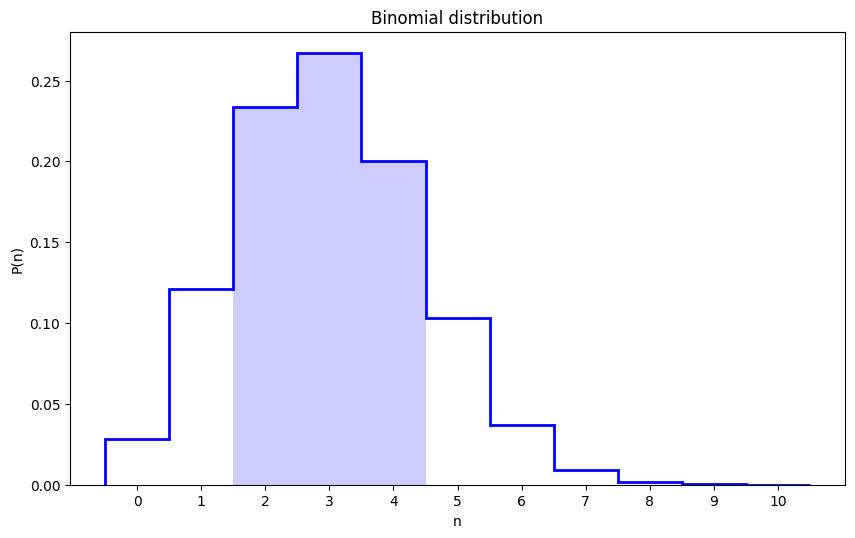

In [10]:
plt.figure(figsize=(10,6), dpi=100)
ns = np.arange(N+1)
p_bin = binom.pmf(ns, N, p)
plt.hist(ns-0.5, weights=p_bin, histtype=u'step', edgecolor='b', linewidth=2, bins=N+1, range=(-0.5,N+0.5))
plt.hist(ns[n_lo:n_hi+1]-0.5, weights=p_bin[n_lo:n_hi+1], width=1, color='b', alpha=0.2, bins=n_hi-n_lo+1, range=(n_lo-0.5,n_hi+0.5))
plt.xticks(ns)
plt.title('Binomial distribution')
plt.xlabel('n')
plt.ylabel('P(n)')
plt.yscale('linear')
plt.show()

## Calcolo dell'intervallo di confidenza

Data un'osservazione $n^\star$, l'intervallo di confidenza $[p_{\mathrm{lo}}, p_{\mathrm{hi}}]$ si ottiene costruendo la fascia di condidenza secondo la costruzione di Neyman, ma questa volta il *coverage* non può essere garantito esattamente, e potranno esserci casi di *overcoverage*. 

Andranno trovati quindi i valori $p_{\mathrm{lo}}$ e $p_{\mathrm{hi}}$ per i quali:

$\displaystyle C(n^\star-1;p_{\mathrm{lo}},N) = \frac{\alpha}{2}$;
$\displaystyle 1-C(n^\star;p_{\mathrm{hi}},N) = \frac{\alpha}{2}$

Questa stima è dovuta a Clopper e Pearson con [un articolo pubblicato nel 1934](https://academic.oup.com/biomet/article-abstract/26/4/404/291538).

L'inversione si può ottenere numericamente, ed è implementata nella funzione [```proportion```](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportion_confint.html
) usando il metodo che viene denominato ```beta```.

Il metodo ```normal```, invece, restituisce il caso di approssimazione gaussiana, con un intervallo simmetrico di semiampiezza:

$\displaystyle\sigma_{\hat{p}} = \sqrt{\frac{\hat{p}\,(1-\hat{p})}{N}}$

Dove $\hat{p}$ è la stima di $p$:

$\hat{p} = p^\star/N$.

In [11]:
import statsmodels.stats.proportion as proportion
n_obs = 3
p_lo, p_hi = proportion.proportion_confint(n_obs, N, alpha=alpha, method='beta')
print("C.Int = [{:.3f}, {:.3f}]".format(p_lo, p_hi))

C.Int = [0.142, 0.508]


Va notato che l'intervallo di confidenza è, nella maggior parte dei casi, asimmetrico rispetto al valore stimato $\hat{p} = p^\star/N$.

In [12]:
p_hat = n_obs/N
print("p = {:.3f} +{:.3f}/-{:.3f}".format(p_hat, p_hi-p_hat, p_hat-p_lo))

p = 0.300 +0.208/-0.158


In [13]:
p_int = proportion.proportion_confint(ns, N, alpha=alpha, method='beta')
p_int_gauss = proportion.proportion_confint(ns, N, alpha=alpha, method='normal')

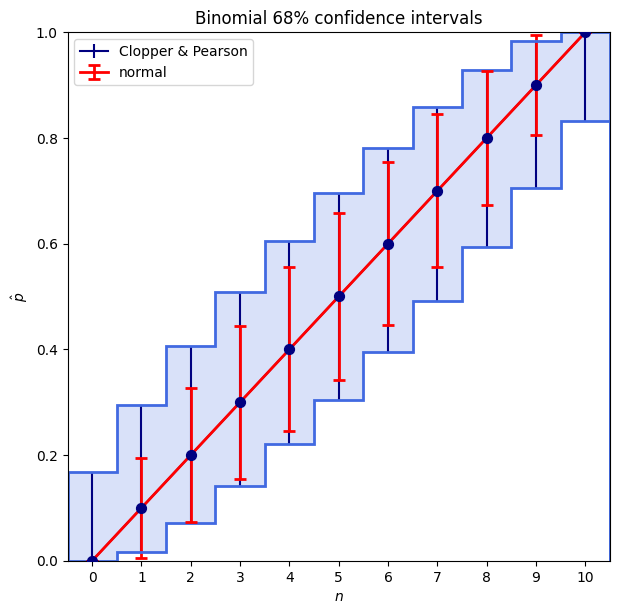

In [14]:
plt.figure(figsize=(7,7), dpi=100)
p_bin = binom.pmf(ns, N, p)
p_hat = ns/N
plt.scatter(ns, p_hat, s=50, color='navy', zorder=10)
plt.errorbar(ns, p_hat, yerr=[p_hat-p_int[0], p_int[1]-p_hat], color='navy', label='Clopper & Pearson')
plt.errorbar(ns, p_hat, yerr=[p_hat-p_int_gauss[0], p_int_gauss[1]-p_hat], color='red', capsize=4, capthick=2, linewidth=2, label='normal')
plt.hist(ns-0.5, weights=p_int[1], bins=N+1, range=(-0.5,N+0.5), histtype=u'step', edgecolor='royalblue', linewidth=2)
plt.hist(ns-0.5, weights=p_int[1], bins=N+1, range=(-0.5,N+0.5), color='royalblue', alpha=0.2)
plt.hist(ns-0.5, weights=p_int[0], bins=N+1, range=(-0.5,N+0.5), histtype=u'step', edgecolor='royalblue', linewidth=2)
plt.hist(ns-0.5, weights=p_int[0], bins=N+1, range=(-0.5,N+0.5), color='white')
plt.ylim(0,1)
plt.xlim(-0.5,N+0.5)
plt.xticks(ns)
plt.title('Binomial 68% confidence intervals')
plt.xlabel(r'$n$')
plt.ylabel(r'$\hat{p}$')
plt.legend()
plt.show()

Va notato che l'errore è completamente asimmetrico nei casi $n^\star=0$ e $n^\star=N$ e non soffre della patolotgia che invece appare nell'approssimazione gaussiana.

## Rivediamo il grafico del plateau di efficienza con intervalli di Clopper Pearson

In [15]:
import pandas as pd
df = pd.read_csv('output/trigger.csv')

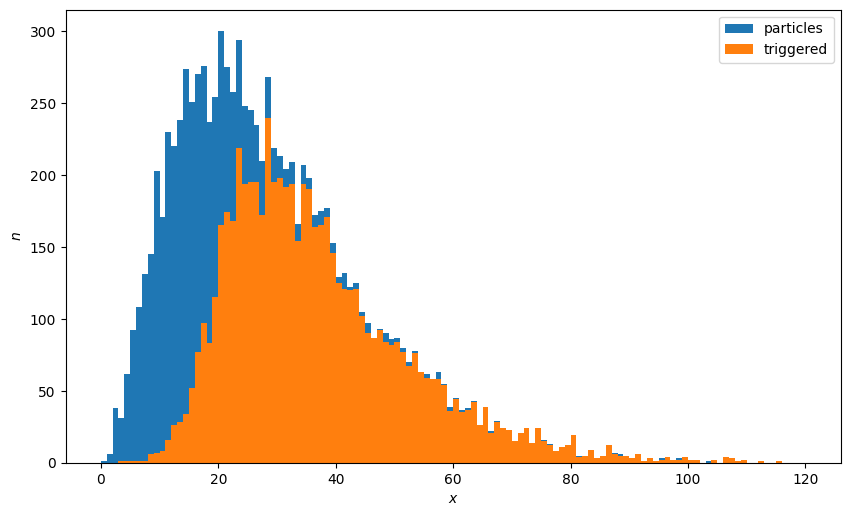

In [16]:
plt.figure(figsize=(10,6), dpi=100)
n_x, bins_x, patches_x = plt.hist(df.x, label='particles', bins=120, range=(0,120))
n_h, bins_h, patches_h = plt.hist(df.x[df.hit], label='triggered', bins=120, range=(0,120))
plt.xlabel('$x$')
plt.ylabel('$n$')
plt.legend()
plt.show()

In [17]:
xs = bins_x[:-1]+0.5
eff = np.divide(n_h, n_x, out=np.zeros_like(n_x), where=n_x!=0)
eff_int = np.array([proportion.proportion_confint(n, N, alpha=alpha, method='beta')
    for n, N in zip(n_h[n_x>0], n_x[n_x>0])])
eff_err = [eff[n_x>0]-eff_int[:,0], eff_int[:,1]-eff[n_x>0]]

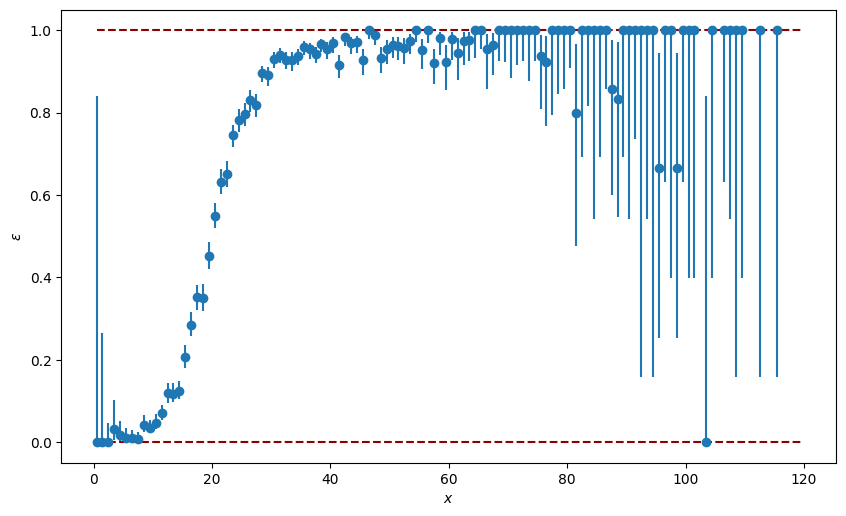

In [18]:
plt.figure(figsize=(10,6), dpi=100)
plt.errorbar(xs[n_x>0], eff[n_x>0], yerr=eff_err, fmt='o')
plt.plot((xs[0], xs[-1]), (0, 0), color='darkred', linestyle='--')
plt.plot((xs[0], xs[-1]), (1, 1), color='darkred', linestyle='--')
plt.xlabel('$x$')
plt.ylabel(r'$\varepsilon$')
plt.show()

## Coverage della stima di Clopper Pearson.

Abbiamo visto che il *coverage* che abbiamo imposto è maggiore del 68% desiderato. Cerchiamo di stimarlo numericamente al variare del parametro $p$.

In [19]:
def plot_coverage(N):
    ps = np.linspace(0.1, 0.9, 1000)
    prob_v = np.vectorize(lambda p: int_prob(p, N)[2])
    covs = prob_v(ps)
    plt.figure(figsize=(10,6), dpi=100)
    plt.plot(ps, covs)
    plt.plot([0,1], [1-alpha]*2, color='r', linestyle='--')
    plt.ylim(0.5,1)
    plt.xlabel('$p$')
    plt.ylabel('coverage')
    plt.title('N = {:d}'.format(N))
    plt.show()

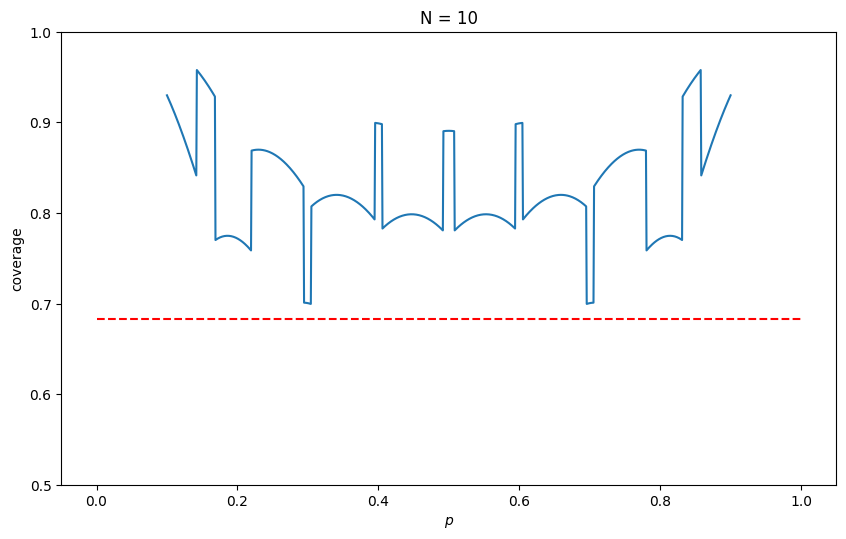

In [20]:
plot_coverage(10)

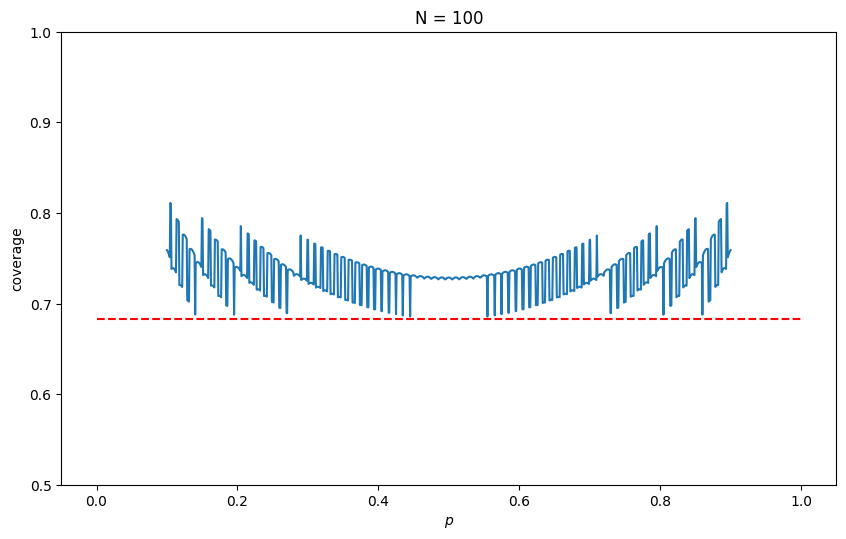

In [21]:
plot_coverage(100)

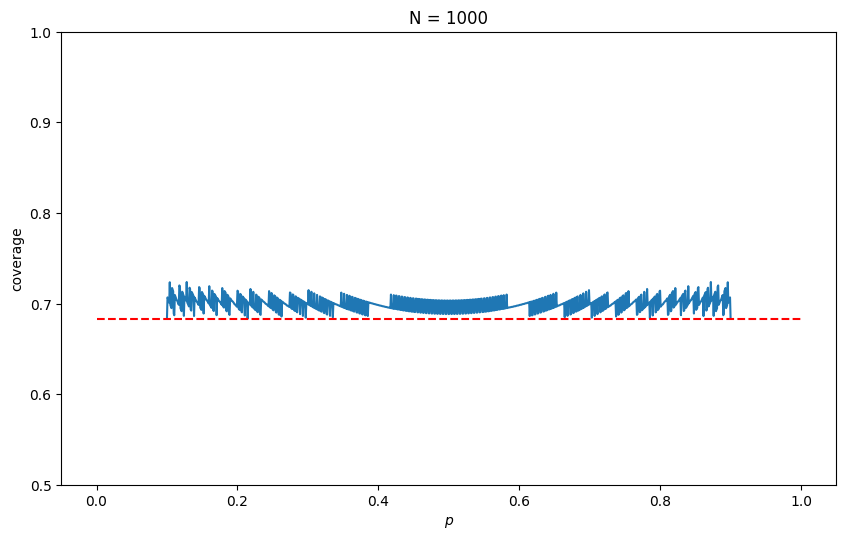

In [22]:
plot_coverage(1000)

Per $N$ che tende ad $\infty$, quindi, il coverage degli intervalli di Clopper Pearson tende a quello ideale. 
Resta comunque il problema nel caso di numeri piccoli di conteggi: la procedura per determinare un certo coverage inevitabilmente conduce ad un intervallo che ha coverage maggiore di quello desiderato!

## Approfondimenti
* [Five Confidence Intervals for Proportions That You Should Know About](https://towardsdatascience.com/five-confidence-intervals-for-proportions-that-you-should-know-about-7ff5484c024f)